In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.2
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.6.2
keras.api._v2.keras 2.6.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# print(housing.data[0:5])
import pprint  # 使得print的结果更为规整，提高可读性

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

# 拆分训练集和测试集，random_state是随机种子,同样的随机数种子，是为了得到同样的随机值
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)

# 训练集
print(x_train.shape, y_train.shape)
# 验证集
print(x_valid.shape, y_valid.shape)
# 测试集
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
# 看特征数目
x_train_scaled.shape[1:]

(8,)

In [7]:
x_train_scaled[1] # 标准化后的值看一下

array([-0.29807281,  0.35226166, -0.10920508, -0.25055521, -0.03406402,
       -0.006034  ,  1.08055484, -1.06113817])

In [8]:
# 回归模型我们只需要1个数
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                      input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),  # 结果层只有1个节点
])

model.summary()

# mean_squared_error MSE 均方误差
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.4057 - val_loss: 0.7639
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 1.6214 - val_loss: 0.5488
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4464 - val_loss: 0.4059
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3872 - val_loss: 0.3888
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3684 - val_loss: 0.3755
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3594 - val_loss: 0.3643
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3551 - val_loss: 0.3626
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3549 - val_loss: 0.3626
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3484 - val_loss: 0.3535
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3442 - val_lo

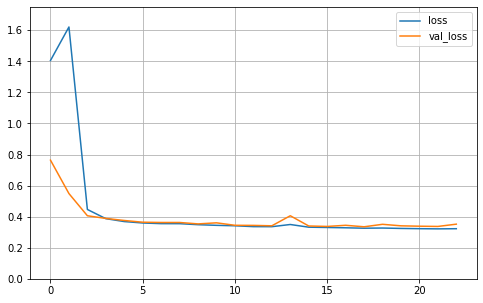

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1.75)
    plt.show()
plot_learning_curves(history)

In [12]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.35722264647483826

In [13]:
np.tanh(-1000)

-1.0